In this weekly challenge, we’ll be exploring data on H2 visa applications, which are requests by
companies to hire foreign workers for non-agricultural jobs within the United States. The U.S.
Department of Labor releases this data as Excel (.XLS) files and BuzzFeed News has been
tracking and hosting these datasets on Github. The dataset we’ll be working with represents H2
applications from October 1, 2010 to March 31, 2016

Data Analysis
To answer these questions, use a combination of quantitative measures and data plots to
answer these questions more thoroughly.
1. How has the number of approved applications changed over time?
2. How have the number of approved workers changed over time?
3. Which locations and types of businesses request the most visas and how has this
changed over time?
4. Which positions are the most frequently requested for these visas?
Bonus
Look for new dataset(s) to deepen your analysis. Here are some ideas:
What
datasets can help you further segment the job_title column?
What
datasets, if any, can help you further segment the employer_name column?

In [2]:
import numpy as np
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

C:\Users\Keerthana\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Users\Keerthana\Anaconda2\lib\site-packages\matplotlib\__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


### The fields in the standardized data are as follows:

Source - https://github.com/BuzzFeedNews/H-2-certification-data#standardized-data

case_no: The OFLC-assigned case number.

visa_type: "H-2A" or "H-2B".

fy: The fiscal year of the most recent OFLC decision/progress on the case.

last_event_date: The date of the most recent OFLC decision/progress on the case.

case_status: The status of the case; typically a variation on "CERTIFIED", "DENIED", "WITHDRAWN", et cetera.

n_requested: The number of workers/visas requested.

n_certified: The number of workers/visas certified.

is_certified: True/False; a standardization of the case_status field.

certification_begin_date / certification_begin_date: "Actual date granted to an employer indicating when the need for the foreign workers to perform agricultural services or labor is expected to [begin / end]." Unavailable for H-2B data prior to FY2007.

job_title: The job title listed by the employer.

employer_name: The name of the employer applying for certification; converted to all-caps.

employer_state: The state the employer listed.

employer_city: The city the employer listed.

employer_address_1: The first line of the address the employer listed.

employer_address_2: The second line of the address the employer listed.

employer_postal_code: The postal code the employer listed.

agent_name: The name of the agent or attorney filing the application for the employer. Some years of data include multiple columns related to visa agents; the standardized field combines these fields, separating them by a :.

organization_flag: Various types of organizations — including sole employers and joint employers — can apply for visa
certifications. This field tracks OFLC's categorizations. Only available for H-2A decisions.

is_duplicate: True/False/null: This derived value will be True — indicating that this row corresponds a sub-application of a joint employer's "master application" — if (a) visa_type is "H-2A", (b) the organization_flag is blank, and (c) comes from fiscal year 2008 or later. H-2A data from FY 2006 and FY 2007 do not contain a organization_flag field. For these records, and H-2B records, is_duplicate will be null.

In [3]:
visa = pd.read_csv("H-2-certification-decisions.csv")

C:\Users\Keerthana\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (0,8,9,14,15,16,17,18,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
visa.head()

,case_no,visa_type,fy,last_event_date,case_status,n_requested,n_certified,is_certified,certification_begin_date,certification_end_date,...,employer_state,employer_city,employer_address_1,employer_address_2,employer_postal_code,worksite_state,worksite_city,agent_name,organization_flag,is_duplicate
0,9455254,H-2B,2000,1999-10-01,"DENIED, TEMPORARY",1,0,False,NaN,NaN,...,CA,LOS ANGELES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8222219,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",2,2,True,NaN,NaN,...,CO,BEAVER CREEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8222168,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",2,2,True,NaN,NaN,...,CO,MT. CRESTED BUTTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8222169,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",5,5,True,NaN,NaN,...,CO,MT. CRESTED BUTTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8222170,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",40,40,True,NaN,NaN,...,CO,MT. CRESTED BUTTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
visa.columns

Index([u'case_no', u'visa_type', u'fy', u'last_event_date', u'case_status',
       u'n_requested', u'n_certified', u'is_certified',
       u'certification_begin_date', u'certification_end_date', u'job_title',
       u'employer_name', u'employer_state', u'employer_city',
       u'employer_address_1', u'employer_address_2', u'employer_postal_code',
       u'worksite_state', u'worksite_city', u'agent_name',
       u'organization_flag', u'is_duplicate'],
      dtype='object')

In [6]:
visa.dtypes

case_no                      object
visa_type                    object
fy                            int64
last_event_date              object
case_status                  object
n_requested                 float64
n_certified                   int64
is_certified                   bool
certification_begin_date     object
certification_end_date       object
job_title                    object
employer_name                object
employer_state               object
employer_city                object
employer_address_1           object
employer_address_2           object
employer_postal_code         object
worksite_state               object
worksite_city                object
agent_name                   object
organization_flag            object
is_duplicate                 object
dtype: object

In [7]:
pandas_profiling.ProfileReport(visa)

Number of variables,22
Number of observations,213155
Total Missing (%),22.0%
Total size in memory,36.0 MiB
Average record size in memory,177.0 B
Numeric,4
Categorical,18
Date,0
Text (Unique),0
Rejected,0
Distinct count,14061


In [8]:
# dropping the columns which have high percentage of missing values or might not be so useful for analysis
# employer_address_1
# employer_address_2

# also dropping duplicate rows

In [9]:
visa.drop(["employer_address_1","employer_address_2"], axis=1, inplace=True)

In [10]:
# dropping the 26 duplicate rows
visa.drop_duplicates(inplace=True)

In [11]:
#exploring the last_event_date column

visa["last_event_date"].dtype

dtype('O')

In [12]:
visa["last_event_date"] = pd.to_datetime(visa["last_event_date"])

In [13]:
%matplotlib inline

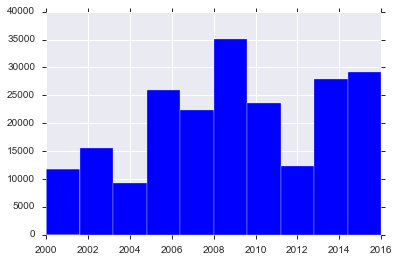

In [14]:
# checking the distribution of fy

visa["fy"].hist()

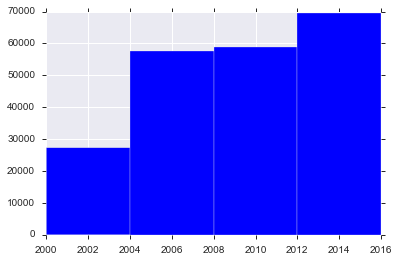

In [15]:
visa["fy"].hist(bins=4)

In [16]:
# since data like certification begin/end date, is_duplicate are unavailable for years before 2007, 
# decided to cut off the dataset to FY 2008 onwards. It would also keep the dataset more recent


In [18]:
print(len(visa[visa["fy"]>=2008]))
print(visa.shape[0])

128197
213120


In [25]:
# it would cut down our dataset to about half of its original size

In [19]:
visa_2008_on = visa[visa["fy"]>=2008]

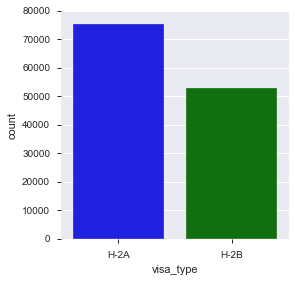

In [21]:
# distribution for visa_type column

sns.factorplot("visa_type",data=visa_2008_on,kind='count')

In [22]:
# exploring the is_duplicate column

visa_2008_on["is_duplicate"].value_counts()

False    47121
True     28144
Name: is_duplicate, dtype: int64

In [24]:
dupl = visa_2008_on[["fy","visa_type","is_duplicate","organization_flag"]]

In [27]:
dupl[dupl["is_duplicate"]==True]["visa_type"].value_counts()

H-2A    28144
Name: visa_type, dtype: int64

#### only H2-A visas are involved when is_duplicate column is set to True

In [29]:
dupl[dupl["is_duplicate"]==True]["organization_flag"].value_counts()

Series([], Name: organization_flag, dtype: int64)

#### organization flag is null for all these values

In [31]:
dupl[dupl["is_duplicate"]==True]["fy"].value_counts()

2016    6436
2008    3031
2010    2959
2009    2854
2015    2775
2014    2680
2012    2588
2011    2417
2013    2404
Name: fy, dtype: int64

#### now lets explore and see if we need to keep the records with is_duplicate column set to true

##### do these rows have the same case_no? 

In [35]:
print(visa_2008_on.shape[0])
print(len(visa_2008_on["case_no"].value_counts()))

128197
103089


out of 128197 total rows, there are 103089 unique case_no

exploring more

In [37]:
visa_2008_on["case_no"].value_counts()

A-08046-05954         211
H-300-14052-552172    206
H-300-15050-738659    206
H-300-16054-724106    203
C-10053-23280         203
H-300-13072-272209    200
C-12066-33398         190
C-11047-27882         184
C-09104-19357         181
C-12045-32764         180
C-10071-23899         173
C-09054-18163         173
A-08107-06673         173
C-11105-29033         170
H-300-14050-670672    159
H-300-16048-986191    158
H-300-14042-064844    156
C-09057-18303         154
H-300-14121-310022    152
C-11055-28042         149
C-11046-27744         145
C-12054-33055         142
H-300-15120-005890    139
H-300-15049-528647    136
H-300-16056-359060    136
H-300-13121-637175    130
A-08053-06049         130
C-09064-18475         128
H-300-13043-590086    128
H-300-13078-105721    128
                     ... 
H-400-15351-124482      1
C-10132-50098           1
H-300-13002-583507      1
H-300-16053-012807      1
H-300-15153-691159      1
C-08025-08074           1
C-08025-08073           1
C-08025-0807

In [39]:
# picking the first entry
single_case = visa_2008_on[visa_2008_on["case_no"] == "A-08046-05954"]

In [40]:
single_case

,case_no,visa_type,fy,last_event_date,case_status,n_requested,n_certified,is_certified,certification_begin_date,certification_end_date,job_title,employer_name,employer_state,employer_city,employer_postal_code,worksite_state,worksite_city,agent_name,organization_flag,is_duplicate
88633,A-08046-05954,H-2A,2008,2008-03-05,CERTIFIED - FULL,NaN,646,True,2008-04-04,2008-12-06,FARM WORKER; DIVERSIFIED CROPS II,"VIRGINIA AGRICULTURAL GROWERS ASSOCIATION, INC.",VA,HALIFAX,24592,VA,HALIFAX,"VIRGINIA AGRICULTURAL GROWERS ASSOCIATION, INC.",A,False
88634,A-08046-05954,H-2A,2008,2008-03-05,CERTIFIED - FULL,NaN,10,True,2008-04-04,2008-12-06,FARM WORKER; DIVERSIFIED CROPS II,HUDSON REESE,VA,SCOTTSBURG,24589,VA,SCOTTSBURG,"VIRGINIA AGRICULTURAL GROWERS ASSOCIATION, INC.",NaN,True
88635,A-08046-05954,H-2A,2008,2008-03-05,CERTIFIED - FULL,NaN,9,True,2008-04-04,2008-12-06,FARM WORKER; DIVERSIFIED CROPS II,TOMMIE & JIMMY COLLIE,VA,RINGGOLD,24586,VA,RINGGOLD,"VIRGINIA AGRICULTURAL GROWERS ASSOCIATION, INC.",NaN,True
88636,A-08046-05954,H-2A,2008,2008-03-05,CERTIFIED - FULL,NaN,9,True,2008-04-04,2008-12-06,FARM WORKER; DIVERSIFIED CROPS II,C.A. MC ENHIMER,VA,ROCKY MOUNT,24151,VA,ROCKY MOUNT,"VIRGINIA AGRICULTURAL GROWERS ASSOCIATION, INC.",NaN,True
88637,A-08046-05954,H-2A,2008,2008-03-05,CERTIFIED - FULL,NaN,8,True,2008-04-04,2008-12-06,FARM WORKER; DIVERSIFIED CROPS II,MALCOLM L. BAILEY,VA,KEYSVILLE,23947,VA,KEYSVILLE,"VIRGINIA AGRICULTURAL GROWERS ASSOCIATION, INC.",NaN,True
88638,A-08046-05954,H-2A,2008,2008-03-05,CERTIFIED - FULL,NaN,8,True,2008-04-04,2008-12-06,FARM WORKER; DIVERSIFIED CROPS II,ELVIS WITCHER,VA,ROCKY MOUNT,24151,VA,ROCKY MOUNT,"VIRGINIA AGRICULTURAL GROWERS ASSOCIATION, INC.",NaN,True
88639,A-08046-05954,H-2A,2008,2008-03-05,CERTIFIED - FULL,NaN,8,True,2008-04-04,2008-12-06,FARM WORKER; DIVERSIFIED CROPS II,TIMOTHY C. NAPIER,VA,KEYSVILLE,23947,VA,KEYSVILLE,"VIRGINIA AGRICULTURAL GROWERS ASSOCIATION, INC.",NaN,True
88640,A-08046-05954,H-2A,2008,2008-03-05,CERTIFIED - FULL,NaN,7,True,2008-04-04,2008-12-06,FARM WORKER; DIVERSIFIED CROPS II,JOHN R. BACON,VA,KENBRIDGE,23944,VA,KENBRIDGE,"VIRGINIA AGRICULTURAL GROWERS ASSOCIATION, INC.",NaN,True
88641,A-08046-05954,H-2A,2008,2008-03-05,CERTIFIED - FULL,NaN,7,True,2008-04-04,2008-12-06,FARM WORKER; DIVERSIFIED CROPS II,HILTON HUDSON,VA,ALTON,24520,VA,ALTON,"VIRGINIA AGRICULTURAL GROWERS ASSOCIATION, INC.",NaN,True
88642,A-08046-05954,H-2A,2008,2008-03-05,CERTIFIED - FULL,NaN,6,True,2008-04-04,2008-12-06,FARM WORKER; DIVERSIFIED CROPS II,KEITH ATKINSON,VA,JAVA,24565,VA,JAVA,"VIRGINIA AGRICULTURAL GROWERS ASSOCIATION, INC.",NaN,True


In [41]:
# lets explore all columns now to see how it works with these cases with the same case number

single_case['visa_type'].value_counts()

H-2A    211
Name: visa_type, dtype: int64

They all have the same visa_type

In [42]:
single_case["fy"].value_counts()

2008    211
Name: fy, dtype: int64

In [43]:
cols = single_case.columns

for col in cols:
    print(single_case[col].value_counts())

A-08046-05954    211
Name: case_no, dtype: int64
H-2A    211
Name: visa_type, dtype: int64
2008    211
Name: fy, dtype: int64
2008-03-05    211
Name: last_event_date, dtype: int64
CERTIFIED - FULL    211
Name: case_status, dtype: int64
Series([], Name: n_requested, dtype: int64)
3      47
4      45
2      41
0      29
6      17
5      13
1      10
8       3
9       2
7       2
646     1
10      1
Name: n_certified, dtype: int64
True     182
False     29
Name: is_certified, dtype: int64
2008-04-04    211
Name: certification_begin_date, dtype: int64
2008-12-06    211
Name: certification_end_date, dtype: int64
FARM WORKER; DIVERSIFIED CROPS II    211
Name: job_title, dtype: int64
CLAUDE V. TOWNSEND                        1
SANFORD J. ADKINS                         1
GARY R. DALTON                            1
DAVID MITCHELL                            1
M.F. MOORE                                1
MEARL T. WITCHER                          1
J. KEVIN MOTLEY                           1
JAMES 

so there is just one entry with is_duplicate column false and all other entries are marked true

They all have different employer names and other employer specific details but a singular agent name and singular case details

Exploring a little further

In [46]:
single_case[single_case["is_duplicate"]==False]

,case_no,visa_type,fy,last_event_date,case_status,n_requested,n_certified,is_certified,certification_begin_date,certification_end_date,job_title,employer_name,employer_state,employer_city,employer_postal_code,worksite_state,worksite_city,agent_name,organization_flag,is_duplicate
88633,A-08046-05954,H-2A,2008,2008-03-05,CERTIFIED - FULL,NaN,646,True,2008-04-04,2008-12-06,FARM WORKER; DIVERSIFIED CROPS II,"VIRGINIA AGRICULTURAL GROWERS ASSOCIATION, INC.",VA,HALIFAX,24592,VA,HALIFAX,"VIRGINIA AGRICULTURAL GROWERS ASSOCIATION, INC.",A,False


the Employer name seems to be the same as the agent name, could this be the case for all other unique cases?

Checking one more case and coming to a decision

In [47]:
another_case = visa_2008_on[visa_2008_on["case_no"] == "H-300-14052-552172"]

In [48]:
another_case

,case_no,visa_type,fy,last_event_date,case_status,n_requested,n_certified,is_certified,certification_begin_date,certification_end_date,job_title,employer_name,employer_state,employer_city,employer_postal_code,worksite_state,worksite_city,agent_name,organization_flag,is_duplicate
174312,H-300-14052-552172,H-2A,2014,2014-04-02,DETERMINATION ISSUED - CERTIFICATION,NaN,756,True,2014-04-10,2014-12-06,"FARMWORKER, DIVERSIFIED CROPS",VAGA,VA,HALIFAX,24558,VA,Dry Fork (See Attachment 1),NaN,Association - Joint Employer (H-2A Only),False
174313,H-300-14052-552172,H-2A,2014,2014-04-02,DETERMINATION ISSUED - CERTIFICATION,NaN,17,True,2014-04-10,2014-12-06,"FARMWORKER, DIVERSIFIED CROPS","WITCHER, ELVIS",VA,ROCKY MOUNT,24151,VA,Dry Fork (See Attachment 1),NaN,NaN,True
174314,H-300-14052-552172,H-2A,2014,2014-04-02,DETERMINATION ISSUED - CERTIFICATION,NaN,10,True,2014-04-10,2014-12-06,"FARMWORKER, DIVERSIFIED CROPS","HUDSON, STEVE R.",VA,ALTON,24520,VA,Dry Fork (See Attachment 1),NaN,NaN,True
174315,H-300-14052-552172,H-2A,2014,2014-04-02,DETERMINATION ISSUED - CERTIFICATION,NaN,10,True,2014-04-10,2014-12-06,"FARMWORKER, DIVERSIFIED CROPS","BACON, IV, JOHN R.",VA,KENBRIDGE,23944,VA,Dry Fork (See Attachment 1),NaN,NaN,True
174316,H-300-14052-552172,H-2A,2014,2014-04-02,DETERMINATION ISSUED - CERTIFICATION,NaN,10,True,2014-04-10,2014-12-06,"FARMWORKER, DIVERSIFIED CROPS","INGRAM, GEORGE S.",VA,KEELING,24566,VA,Dry Fork (See Attachment 1),NaN,NaN,True
174317,H-300-14052-552172,H-2A,2014,2014-04-02,DETERMINATION ISSUED - CERTIFICATION,NaN,9,True,2014-04-10,2014-12-06,"FARMWORKER, DIVERSIFIED CROPS","SHELTON, TIMOTHY L.",VA,DRY FORK,24549,VA,Dry Fork (See Attachment 1),NaN,NaN,True
174318,H-300-14052-552172,H-2A,2014,2014-04-02,DETERMINATION ISSUED - CERTIFICATION,NaN,9,True,2014-04-10,2014-12-06,"FARMWORKER, DIVERSIFIED CROPS","CLARY, B. CARL",VA,RAWLINGS,23876,VA,Dry Fork (See Attachment 1),NaN,NaN,True
174319,H-300-14052-552172,H-2A,2014,2014-04-02,DETERMINATION ISSUED - CERTIFICATION,NaN,9,True,2014-04-10,2014-12-06,"FARMWORKER, DIVERSIFIED CROPS",REESE FARMS,VA,SCOTTSBURG,24589,VA,Dry Fork (See Attachment 1),NaN,NaN,True
174320,H-300-14052-552172,H-2A,2014,2014-04-02,DETERMINATION ISSUED - CERTIFICATION,NaN,9,True,2014-04-10,2014-12-06,"FARMWORKER, DIVERSIFIED CROPS",S. J. BRANDON LLC,VA,DUNDAS,23938,VA,Dry Fork (See Attachment 1),NaN,NaN,True
174321,H-300-14052-552172,H-2A,2014,2014-04-02,DETERMINATION ISSUED - CERTIFICATION,NaN,9,True,2014-04-10,2014-12-06,"FARMWORKER, DIVERSIFIED CROPS","POWELL, KENNY",VA,EMPORIA,23847,VA,Dry Fork (See Attachment 1),NaN,NaN,True


In [49]:
for col in cols:
    print(another_case[col].value_counts())

H-300-14052-552172    206
Name: case_no, dtype: int64
H-2A    206
Name: visa_type, dtype: int64
2014    206
Name: fy, dtype: int64
2014-04-02    206
Name: last_event_date, dtype: int64
DETERMINATION ISSUED - CERTIFICATION    206
Name: case_status, dtype: int64
Series([], Name: n_requested, dtype: int64)
4      42
2      34
3      32
5      28
0      24
6      15
1       9
8       7
9       6
7       4
10      3
756     1
17      1
Name: n_certified, dtype: int64
True     182
False     24
Name: is_certified, dtype: int64
2014-04-10    205
2013-04-10      1
Name: certification_begin_date, dtype: int64
2014-12-06    206
Name: certification_end_date, dtype: int64
FARMWORKER, DIVERSIFIED CROPS    206
Name: job_title, dtype: int64
SHADY OAKS FM.                1
CLARK, STEVE                  1
PARRISH, JR. CHARLES H.       1
WILLIAMS, DAVID A.            1
WYATT, WILLIAM F.             1
COOK, DENTON                  1
NESTOR, JAMES                 1
BARNARD, K. F.                1
HALL & SO

In [50]:
# Again, a lot of the relevant details seem to be the same, so it would be wise to remove the duplicate rows from
# the dataset

visa_2008_on = visa_2008_on[visa_2008_on["is_duplicate"] != True]

In [51]:
# lets now explore the case_status column

visa_2008_on["case_status"].value_counts()

CERTIFIED - FULL                                        28385
CERTIFIED                                               23622
DETERMINATION ISSUED - CERTIFICATION                    13559
CERTIFICATION                                           11205
PARTIAL CERTIFIED                                        7583
DENIED                                                   7348
WITHDRAWN                                                2735
PARTIAL CERTIFICATION                                    1957
CERTIFIED - PARTIAL                                      1369
DETERMINATION ISSUED - CERTIFICATION EXPIRED              905
DETERMINATION ISSUED - DENIED                             362
CERTIFICATION EXPIRED                                     354
DETERMINATION ISSUED - WITHDRAWN                          337
DETERMINATION ISSUED - PARTIAL CERTIFICATION              213
PARTIAL CERTIFICATION EXPIRED                              84
DETERMINATION ISSUED - PARTIAL CERTIFICATION EXPIRED       33
FINAL RE

In [52]:
# we can clean up these values for better analysis

status_map = {"CERTIFIED - FULL" : "CERTIFIED",
              "CERTIFIED" : "CERTIFIED",
              "DETERMINATION ISSUED - CERTIFICATION": "CERTIFIED",
              "CERTIFICATION":"CERTIFIED",
              "PARTIAL CERTIFIED" : "PARTIAL CERTIFIED",
              "DENIED" : "DENIED",
              "WITHDRAWN" : "WITHDRAWN",
              "PARTIAL CERTIFICATION" : "PARTIAL CERTIFIED",
              "CERTIFIED - PARTIAL":"PARTIAL CERTIFIED",
              "DETERMINATION ISSUED - CERTIFICATION EXPIRED" : "CERTIFICATION EXPIRED",
              "DETERMINATION ISSUED - DENIED" : "DENIED",
              "CERTIFICATION EXPIRED" : "CERTIFICATION EXPIRED",
              "DETERMINATION ISSUED - WITHDRAWN" : "WITHDRAWN",
              "DETERMINATION ISSUED - PARTIAL CERTIFICATION": "PARTIAL CERTIFIED",
              "PARTIAL CERTIFICATION EXPIRED" : "PARTIAL CERTIFICATION EXPIRED",
              "FINAL REVIEW" : "FINAL REVIEW "
}

In [54]:
visa_2008_on["status"] = visa_2008_on["case_status"].map(status_map)

C:\Users\Keerthana\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [55]:
visa_2008_on["status"].value_counts()

CERTIFIED                        76771
PARTIAL CERTIFIED                11122
DENIED                            7710
WITHDRAWN                         3072
CERTIFICATION EXPIRED             1259
PARTIAL CERTIFICATION EXPIRED       84
FINAL REVIEW                         2
Name: status, dtype: int64

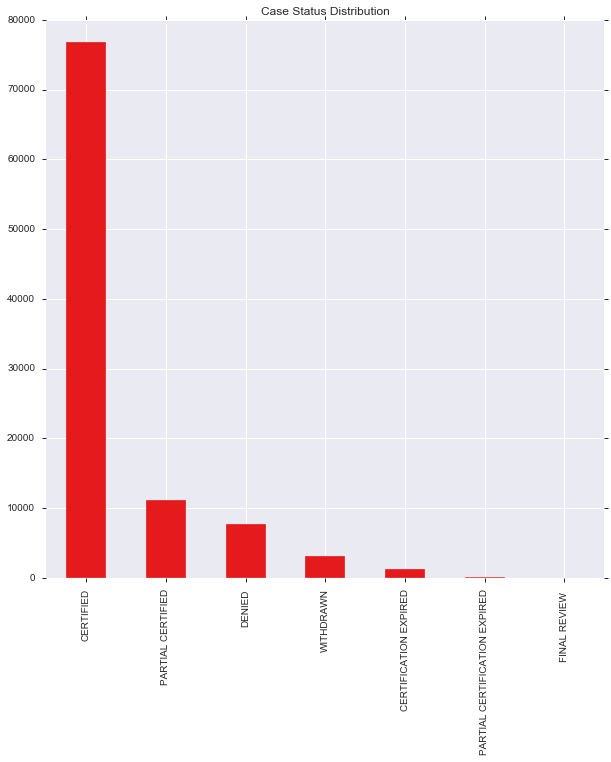

In [212]:
fig = plt.figure(figsize=(10,10))
visa_2008_on["status"].value_counts().plot(kind='bar',colormap='Set1')
plt.title("Case Status Distribution")
plt.show()

In [94]:
partial = visa_2008_on[["fy","status"]]

In [110]:
certified = partial[partial["status"]=="CERTIFIED"]["fy"].value_counts()

In [125]:
certified = certified.sort_index()

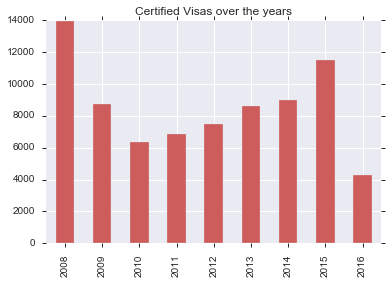

In [128]:
# how has number of certified H2 visas changed over time?

certified.plot(kind='bar',color='indianred')
plt.title("Certified Visas over the years")
plt.show()

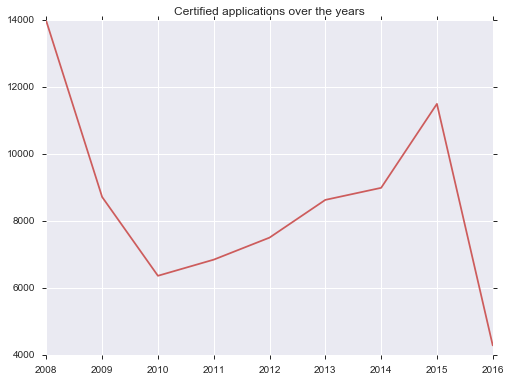

In [136]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.set(xticklabels=certified.index)
certified.plot(kind='line',color='indianred')
plt.title("Certified applications over the years")
plt.show()

As we can see, on a general basis, the number of certified applications has decreased steadily until 2010

Then it seems to have climbed up until 2015

And then there is again a dip in 2016

In [138]:
part_year_type = visa_2008_on[["fy","status","visa_type"]]

In [143]:
part_year_type_certified = part_year_type[part_year_type["status"]=="CERTIFIED"]
part_year_type_certified

,fy,status,visa_type
84936,2008,CERTIFIED,H-2A
84937,2008,CERTIFIED,H-2A
84938,2008,CERTIFIED,H-2A
84939,2008,CERTIFIED,H-2A
84942,2008,CERTIFIED,H-2A
84943,2008,CERTIFIED,H-2A
84944,2008,CERTIFIED,H-2A
84945,2008,CERTIFIED,H-2A
84946,2008,CERTIFIED,H-2A
84947,2008,CERTIFIED,H-2A


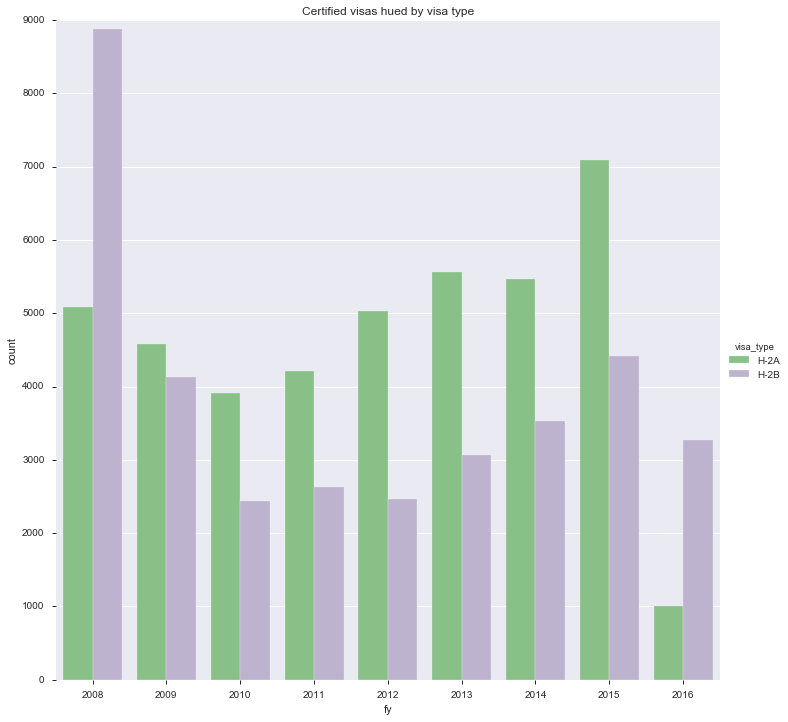

In [157]:
sns.factorplot("fy",data=part_year_type_certified,kind='count',hue='visa_type',size=10,palette='Accent')
sns.plt.title("Certified visas hued by visa type")
sns.plt.show()

The distribution is slightly different when it comes to visas segregated by their type

H2A visas had a decrease till 2010 and then a increase until 2015 and then a drastic dip in 2016

H2B visas had a decrease till 2012 and then a steady increase until 2015 with a slight dip in 2016

In [160]:
visa_2008_on.head()

,case_no,visa_type,fy,last_event_date,case_status,n_requested,n_certified,is_certified,certification_begin_date,certification_end_date,...,employer_name,employer_state,employer_city,employer_postal_code,worksite_state,worksite_city,agent_name,organization_flag,is_duplicate,status
84936,C-07243-06148,H-2A,2008,2007-10-01,CERTIFIED - FULL,NaN,2,True,2007-11-01,2008-04-30,...,BENJAMIN SEIDLER,ND,UNDERWOOD,58576,ND,UNDERWOOD,LESLI DOWNS & KRIS GOSNEY,S,False,CERTIFIED
84937,C-07256-06229,H-2A,2008,2007-10-01,CERTIFIED - FULL,NaN,3,True,2007-11-01,2008-08-30,...,AL CRAMER FARMS,LA,BRANCH,70516,LA,BRANCH,"KELLY J. COUCH, CONSULTANT",S,False,CERTIFIED
84938,C-07248-06159,H-2A,2008,2007-10-01,CERTIFIED - FULL,NaN,5,True,2007-11-01,2008-08-31,...,LARRY D. WOMACK- WOMACK NURSERY CO,TX,DELEON,76444,TX,DELEON,HELEEN VAN TONDER,S,False,CERTIFIED
84939,C-07263-06300,H-2A,2008,2007-10-01,CERTIFIED - FULL,NaN,8,True,2007-11-01,2008-08-31,...,DALE HENSGENS FARM,LA,BRANCH,70516,LA,BRANCH,KELLY J. COUCH,S,False,CERTIFIED
84940,C-07269-06329,H-2A,2008,2007-10-01,WITHDRAWN,NaN,0,False,NaN,NaN,...,VERNON SMITH (VT SMITH & SON),MT,EMIGRANT,59027,MT,EMIGRANT,SNAKE RIVER FARMERS ASSOCIATION,S,False,WITHDRAWN


In [184]:
# lineplots of h2a and h2b visas over time

h2a_certified = visa_2008_on[(visa_2008_on["visa_type"] == "H-2A") & (visa_2008_on["status"] == "CERTIFIED")]["fy"].value_counts()
h2b_certified = visa_2008_on[(visa_2008_on["visa_type"] == "H-2B") & (visa_2008_on["status"] == "CERTIFIED")]["fy"].value_counts()

In [185]:
h2a_certified = h2a_certified.sort_index()
h2b_certified = h2b_certified.sort_index()

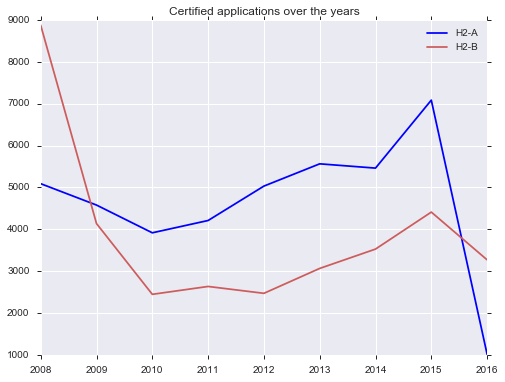

In [186]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.set(xticklabels = h2a_certified.index)
ax.plot(h2a_certified,label="H2-A")
ax.plot(h2b_certified,label="H2-B",color='indianred')
plt.legend()
plt.title("Certified applications over the years")
plt.show()

In [189]:
denied_total = visa_2008_on[visa_2008_on["status"] == "DENIED"]["fy"].value_counts()
denied_total = denied_total.sort_index()

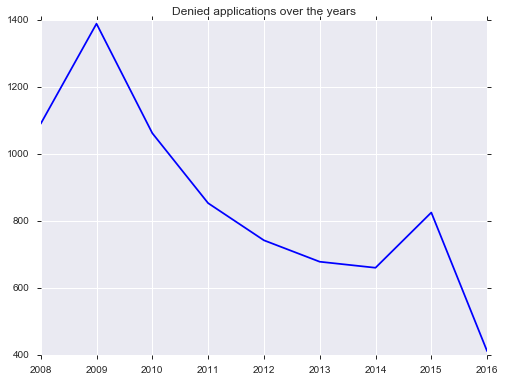

In [190]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.plot(denied_total)
ax.set(xticklabels = denied_total.index)
plt.title("Denied applications over the years")
plt.show()

As we can clearly see, the number of denied applications has clearly gone down. 

Is this the trend for both the visa types? We can check that


In [209]:
denied_h2a = visa_2008_on[(visa_2008_on["status"] == "DENIED") & (visa_2008_on["visa_type"] == "H-2A")]["fy"].value_counts()
denied_h2b = visa_2008_on[(visa_2008_on["status"] == "DENIED") & (visa_2008_on["visa_type"] == "H-2B")]["fy"].value_counts()
denied_h2a = denied_h2a.sort_index()
denied_h2b = denied_h2b.sort_index()

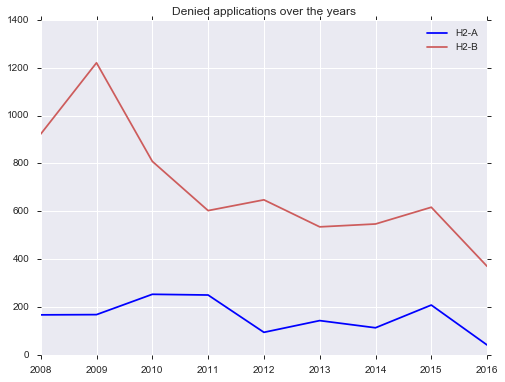

In [210]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.set(xticklabels = denied_h2a.index)
ax.plot(denied_h2a,label="H2-A")
ax.plot(denied_h2b,label="H2-B",color='indianred')
plt.legend()
plt.title("Denied applications over the years")
plt.show()

As we can observe, there is a much rapid decline in the number of H2-B visas denied over the years

The decline in the number of H2-A visas on the other hand, is much more gentle, and more or less constant over the years

In [213]:
# we can now explore the columns - employer_state and worksite_state

visa_2008_on[["employer_state","worksite_state"]].head()

,employer_state,worksite_state
84936,ND,ND
84937,LA,LA
84938,TX,TX
84939,LA,LA
84940,MT,MT


In [218]:
len(visa_2008_on[visa_2008_on["employer_state"] != visa_2008_on["worksite_state"]])

7105

Not all employer and worksite states are the same

We can explore the worksite_state column further to see which state needs has the most requests for employees

In [240]:
state = pd.DataFrame(visa_2008_on["worksite_state"].value_counts())
ind = np.arange(0,len(state))
state.reset_index(inplace=True)
state.rename(columns={"index":"state","worksite_state":"number of requests"},inplace=True)
state.head()

,state,number of requests
0,TX,9369
1,LA,7381
2,KY,6904
3,NY,5849
4,FL,4526


In [245]:
state.dtypes

state                 object
number of requests     int64
dtype: object

In [249]:
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

In [247]:
data = [ dict(
        type='choropleth',
        locations = state['state'],
        z = state['number of requests'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Number of Requests"
        )
    ) ]

In [250]:
layout = dict(
        title = 'Number of visa requests per state',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )
    
fig = dict( data=data, layout=layout )

url = py.plot( fig, filename='h2map' )
tls.embed(url)

Please note that github doesn't support ipython rendering, so to view the plotly plots, go to the below link

http://nbviewer.jupyter.org/github/chrke/H2VisaAnalysis/blob/master/H2%20Analysis.ipynb

In [263]:
visa_2008_on[["n_requested","n_certified"]].head()

,n_requested,n_certified
84936,NaN,2
84937,NaN,3
84938,NaN,5
84939,NaN,8
84940,NaN,0


In [290]:
a = len(visa_2008_on[np.isnan(visa_2008_on["n_requested"])])
b = visa_2008_on.shape[0]
print(a)
print(b)
print((a/b)*100)

57593
100053
57.5624918793


In [291]:
a = len(visa_2008_on[np.isnan(visa_2008_on["n_certified"])])
b = visa_2008_on.shape[0]
print(a)
print(b)
print((a/b)*100)

0
100053
0.0


Almost 57% of n_requested values are missing

None of the n_certified values are missing

So let's look at the n_certified column in detail

In [294]:
visa_2008_on[["fy","n_certified"]].head()

,fy,n_certified
84936,2008,2
84937,2008,3
84938,2008,5
84939,2008,8
84940,2008,0


In [298]:
certified_requests = pd.pivot_table(data=visa_2008_on,values="n_certified",index="fy",aggfunc=np.sum)

In [303]:
certified_requests

fy
2008    344703
2009    247891
2010    165799
2011    160768
2012    160695
2013    181120
2014    210337
2015    241490
2016    104026
Name: n_certified, dtype: int64

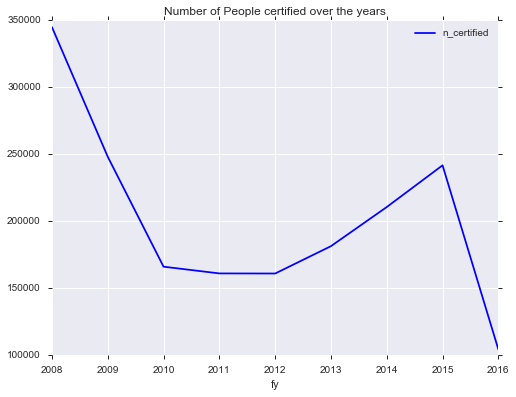

In [304]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)
ax.set_xticklabels(certified_requests.index.tolist())
certified_requests.plot()
plt.legend()
plt.title("Number of People certified over the years")
plt.show()

In [306]:
# would it be the same trend if we split the visas by their type, we can check that

certified_type = pd.pivot_table(data=visa_2008_on,values="n_certified",columns=["visa_type"],index="fy",aggfunc=np.sum)

In [307]:
certified_type

visa_type,H-2A,H-2B
fy,,
2008,90123,254580
2009,85985,161906
2010,79203,86596
2011,77616,83152
2012,85237,75458
2013,98813,82307
2014,116688,93649
2015,139725,101765
2016,23717,80309


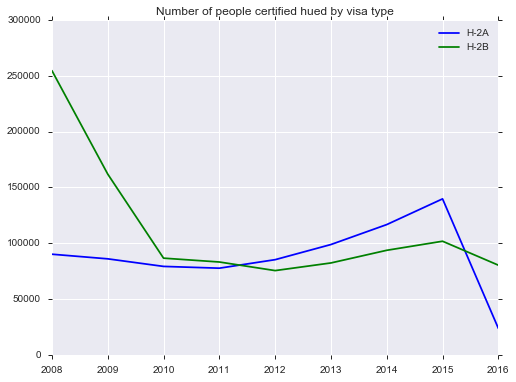

In [322]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.plot(certified_type["H-2A"])
ax.plot(certified_type["H-2B"])
ax.set_xticklabels(certified_type.index.tolist())
plt.legend()
plt.title("Number of people certified hued by visa type")
plt.show()

As we can see, the number of certified people over the years follows different trends for the two visa types

H-2A has a more of less constant number over the years with a dip in 2016

H-2B has a large dip from 2008 to 2010 and then maintains constancy until 2016

In [323]:
visa_2008_on["job_title"].value_counts()

LABORER, LANDSCAPE                                    8373
LANDSCAPE LABORER                                     4942
FARMWORKERS AND LABORERS, CROP                        2710
FARM WORKERS & LABORERS, CROP                         2078
FARMWORKER                                            2058
CLEANER, HOUSEKEEPING                                 1783
HOUSEKEEPER                                           1610
FARM WORKER                                           1576
AGRICULTURAL EQUIPMENT OPERATOR                       1526
GROUNDSKEEPER, INDUSTRIAL COMMERCIAL                  1500
SHEEPHERDER                                           1413
CONSTRUCTION WORKER I                                 1256
STABLE ATTENDANT                                      1238
FARM LABOR                                            1219
COOK                                                  1101
FARMWORKERS, FARM AND RANCH ANIMALS                    840
FARM/IRRIGATION/LIVESTOCK WORKER                       8

In [324]:
len(visa_2008_on["job_title"].value_counts())

7078

There are 7078 different job titles. Checking if this can be analysed in a simple way

In [325]:
# trying to find a way to eliminate repeated job titles and to club them into a singular job title

In [326]:
job_titles = visa_2008_on["job_title"].value_counts().index

In [327]:
job_titles

Index([u'LABORER, LANDSCAPE', u'LANDSCAPE LABORER',
       u'FARMWORKERS AND LABORERS, CROP', u'FARM WORKERS & LABORERS, CROP',
       u'FARMWORKER', u'CLEANER, HOUSEKEEPING', u'HOUSEKEEPER', u'FARM WORKER',
       u'AGRICULTURAL EQUIPMENT OPERATOR',
       u'GROUNDSKEEPER, INDUSTRIAL COMMERCIAL',
       ...
       u'FARMWOKER, GENERAL I', u'FAR WORKER AND LABORER, CROP',
       u'ADMITTING OFFICER', u'HARVESTWORKER', u'HEAVY MACHINE OPERATORS',
       u'WELDER, GAS', u'FARM LABORER- CROP',
       u'FILTER OPERATOR/EVAPORATOR OPERATOR',
       u'12/FARMWORKERS DIVERSIFIED CROPS II', u'MEAT PROCESSORS'],
      dtype='object', length=7078)

In [354]:
# trying sequence matcher

from difflib import SequenceMatcher

In [359]:
SequenceMatcher(None, 'LABORER, LANDSCAPE', 'LANDSCAPE LABORER').ratio()

0.5142857142857142

In [ ]:
# not much luck with Sequence matcher
# trying fuzzywuzzy library in python

In [360]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process 

C:\Users\Keerthana\Anaconda2\lib\site-packages\fuzzywuzzy\fuzz.py:35: UserWarning:

Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning



In [361]:
fuzz.ratio('LABORER, LANDSCAPE', 'LANDSCAPE LABORER')

51

In [362]:
fuzz.token_sort_ratio('LABORER, LANDSCAPE', 'LANDSCAPE LABORER')

100

In [363]:
fuzz.token_set_ratio('LABORER, LANDSCAPE', 'LANDSCAPE LABORER')

100

In [369]:
fuzz.token_sort_ratio('FARMWORKER', 'FARM WORKER')

95

In [364]:
# Awesome! It works!

fuzz.token_set_ratio('FARMWORKER', 'FARM WORKER')

95

In [372]:
# it works, now trying to use this to merge together similar job titles

top = visa_2008_on["job_title"].value_counts().head(20)

In [373]:
top

LABORER, LANDSCAPE                      8373
LANDSCAPE LABORER                       4942
FARMWORKERS AND LABORERS, CROP          2710
FARM WORKERS & LABORERS, CROP           2078
FARMWORKER                              2058
CLEANER, HOUSEKEEPING                   1783
HOUSEKEEPER                             1610
FARM WORKER                             1576
AGRICULTURAL EQUIPMENT OPERATOR         1526
GROUNDSKEEPER, INDUSTRIAL COMMERCIAL    1500
SHEEPHERDER                             1413
CONSTRUCTION WORKER I                   1256
STABLE ATTENDANT                        1238
FARM LABOR                              1219
COOK                                    1101
FARMWORKERS, FARM AND RANCH ANIMALS      840
FARM/IRRIGATION/LIVESTOCK WORKER         805
FARM WORKER/ LABORER                     784
GENERAL FARM/IRRIGATION WORKER           783
NURSERY WORKER                           730
Name: job_title, dtype: int64

In [392]:
unique = set()
for s in process.extract(top.index[0],top.index):
    if s[1] > 90:
        unique.add(s[0])
unique

{'LABORER, LANDSCAPE', 'LANDSCAPE LABORER'}

In [397]:
new_top = pd.Series()
sum = 0
for item in unique:
    sum += top[item]

new_top[item] = sum

In [398]:
new_top

LABORER, LANDSCAPE    13315
dtype: int64

In [399]:
# it worked for one item, now trying to automate it over all the list items

In [444]:
unique_set = set()
for i in range(len(top)):
    unique = set()
    for s in process.extract(top.index[i],top.index):
        if s[1] > 90:
            unique.add(s[0])
    unique_set.add(frozenset(unique))

In [445]:
unique_set

{frozenset({'LABORER, LANDSCAPE', 'LANDSCAPE LABORER'}),
 frozenset({'GROUNDSKEEPER, INDUSTRIAL COMMERCIAL'}),
 frozenset({'FARM WORKERS & LABORERS, CROP',
            'FARMWORKERS AND LABORERS, CROP'}),
 frozenset({'CONSTRUCTION WORKER I'}),
 frozenset({'FARM WORKER/ LABORER'}),
 frozenset({'FARM LABOR'}),
 frozenset({'GENERAL FARM/IRRIGATION WORKER'}),
 frozenset({'STABLE ATTENDANT'}),
 frozenset({'AGRICULTURAL EQUIPMENT OPERATOR'}),
 frozenset({'FARM/IRRIGATION/LIVESTOCK WORKER'}),
 frozenset({'FARMWORKERS, FARM AND RANCH ANIMALS'}),
 frozenset({'SHEEPHERDER'}),
 frozenset({'FARM WORKER', 'FARMWORKER'}),
 frozenset({'NURSERY WORKER'}),
 frozenset({'CLEANER, HOUSEKEEPING'}),
 frozenset({'COOK'}),
 frozenset({'HOUSEKEEPER'})}

In [439]:
new_top = pd.Series()
for i in range(len(unique_set)):
    tot = 0
    for item in list(list(unique_set)[i]):
        tot += top[item]
    new_top[item] = tot

In [440]:
new_top

LABORER, LANDSCAPE                      13315
GROUNDSKEEPER, INDUSTRIAL COMMERCIAL     1500
FARM WORKERS & LABORERS, CROP            4788
CONSTRUCTION WORKER I                    1256
FARM WORKER/ LABORER                      784
FARM LABOR                               1219
GENERAL FARM/IRRIGATION WORKER            783
STABLE ATTENDANT                         1238
AGRICULTURAL EQUIPMENT OPERATOR          1526
FARM/IRRIGATION/LIVESTOCK WORKER          805
FARMWORKERS, FARM AND RANCH ANIMALS       840
SHEEPHERDER                              1413
FARM WORKER                              3634
NURSERY WORKER                            730
CLEANER, HOUSEKEEPING                    1783
COOK                                     1101
HOUSEKEEPER                              1610
dtype: int64

In [459]:
fuzz.token_set_ratio('FARM','FARM WORKER')

100